Following code has a variable:hashtag_var which takes the hashtag, retrieves the tweets for it and generates 
the final map with the number of tweets plotted in each state in the map.

Loading required package: ggplot2
------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:twitteR':

    id, location

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] "Using direct authentication"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%C3%A9xico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Thailand&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Makati%20City&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ephraim,%20UT&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=converse%20%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%9A%E0%B8%AD%E0%B8%AA%E0%B8%82%E0%B8%B2%E0%B8%B2%E0%B8%B2&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "conve

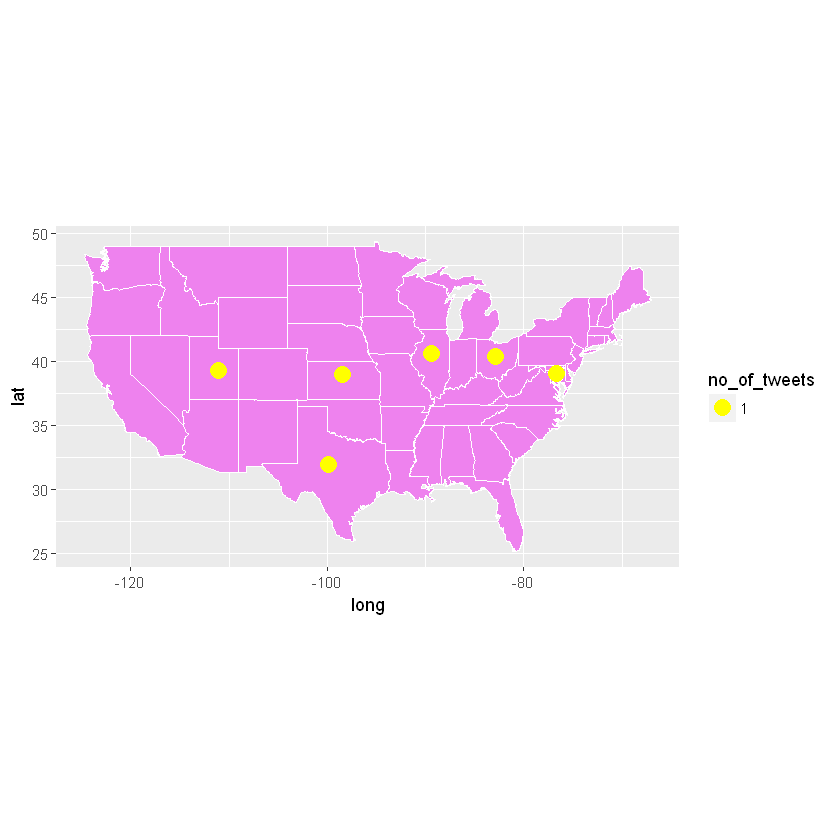

In [2]:
library(twitteR)
library(ggmap)
library(data.table)
library(dplyr)
setup_twitter_oauth("***", "***", "***", "***")
hashtag_var <- "#BeautyAndTheBeast"
tweets <- searchTwitter(hashtag_var, n=20)
tweets_df <- twListToDF(tweets)
users_list <- lookupUsers(tweets_df$screenName, includeNA=FALSE)
users_df <- twListToDF(users_list)
users_locations <- geocode(users_df$location)
users_locations <- na.omit(users_locations)
user_locations_df <- data.frame(users_locations)
reverse_locations <- mapply(FUN = function(lon, lat) { 
  revgeocode(c(lon, lat), output = "more") 
  }, 
  user_locations_df$lon, user_locations_df$lat
)
reverse_locations_dt <- rbindlist(reverse_locations,fill=TRUE)
reverse_locations_subset <- subset(reverse_locations_dt ,country=="United States", select=c(administrative_area_level_1))
states_grouped <- group_by (reverse_locations_subset,administrative_area_level_1)
states_grouped_map <- summarise(states_grouped, n())
states_grouped_table <- data.table(states_grouped_map)
colnames(states_grouped_table) <- c("state", "no_of_tweets")
states_list <- c(as.character(states_grouped_table$state))
states_geocodes <- geocode(states_list)
states <- data.frame(states_grouped_table[,1:2],states_geocodes)
us_state_map <- map_data("state")
map <- ggplot()
map <- map + geom_polygon( data=us_state_map, aes(x=long, y=lat, group = group),colour="white",fill="violet" )
map <- map + geom_point( data=states, aes(x=lon, y=lat, size = no_of_tweets), color="yellow")+ coord_fixed(1.3)
map

The below code reads the state_tweets_map file(which has the states and correspoding count of no of tweets in each state
and the coordinates) and plots the map

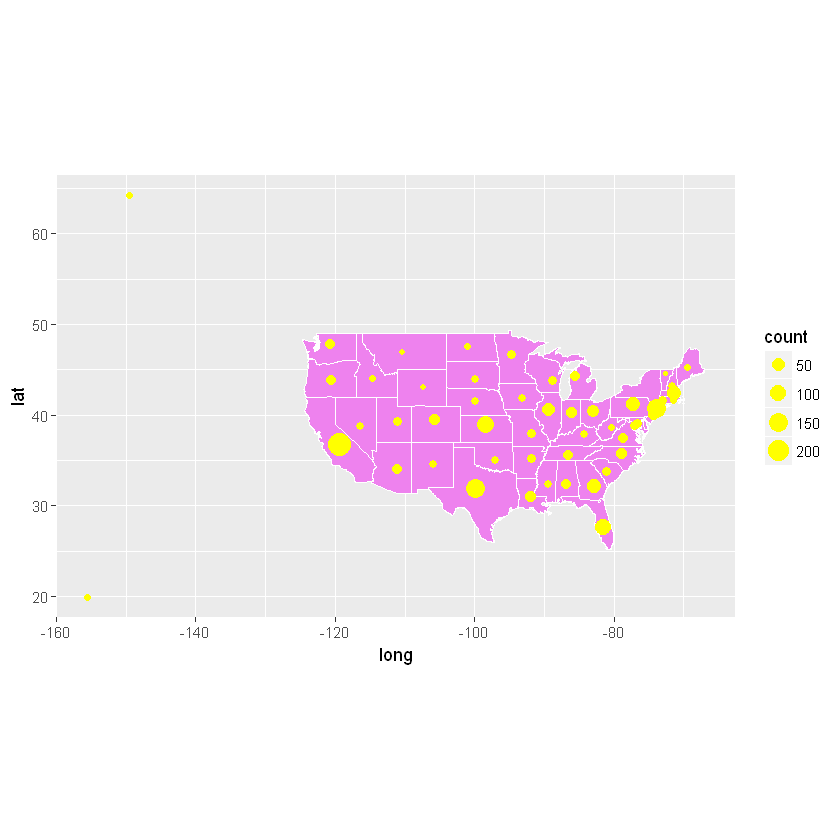

In [49]:
library(twitteR)
library(ggmap)
states_map <- read.csv(file="states_tweets_data.csv",head=TRUE,sep=",")
us_state_map <- map_data("state")
p <- ggplot()
p <- p + geom_polygon( data=us_state_map, aes(x=long, y=lat, group = group),colour="white",fill="violet" )
p <- p + geom_point( data=states_map, aes(x=lon, y=lat, size = count), color="yellow")+
coord_fixed(1.3)
p

The below work includes all the work done during the project including few steps which are not there in the final code

Importing twitteR and authorization with twitter using the secret key and token created

In [279]:
library(twitteR)

In [282]:
setup_twitter_oauth("***", "***", "***", "***")

[1] "Using direct authentication"


Gathering tweets for super bowl hashtag

In [284]:
tweets <- searchTwitter('#SuperBowl', n=20000)

No of tweets gathered: 20000

Persisting the tweets data to enable reloading it to a later R session

In [286]:
sql_lite_file = tempfile()
register_sqlite_backend("C:/Users/nitik/superBowlData")
store_tweets_db(tweets)

Loading required namespace: RSQLite


[1] TRUE

Reloading the stored tweets

In [289]:
from_db = load_tweets_db()

Gathered tweets displayed

In [290]:
head(from_db)

[[1]]
[1] "PhobicHD: RT @itsGhostYT: If the falcons win the super bowl I'll give everyone who retweets this $10 #SB51 #SuperBowl https://t.co/TOVMyuPJUO"

[[2]]
[1] "artvlouis: RT @justinbieber: My #SuperBowl commercial w/ @TMobile. Lets go!! Let me see those #UnlimitedMoves https://t.co/J3YYPkR9nw"

[[3]]
[1] "fans_patriot: Cause @Patriots won!! #SB51 #SuperBowl #SuperBowlChampions Gostkowski!! https://t.co/KXPWUcaCBq"

[[4]]
[1] "pkjmaf58: RT @VoteTrumpPics: RT<ed><U+00A0><U+00BD><ed><U+00B2><U+00A5> If You are Praying for President Trump<ed><U+00A0><U+00BD><ed><U+00B9><U+008F>\n\n@POTUS @realDonaldTrump\n#Pray4DJT <ed><U+00A0><U+00BD><ed><U+00B9><U+008F> #SuperBowl https://t.co/XPSOYOUkxD"

[[5]]
[1] "WestCoastMdnitR: #johnwick2 #Superbowl assassin or super agent @PierceBrosnan?  Line is gone the #adrenalinerush kick outdoes @007 - what's next @FastFurious"

[[6]]
[1] "__MarcRivera: RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ"


Converting list of tweets into data frame

In [291]:
df <- twListToDF(from_db)

Tweets displayed in a data frame structure

In [292]:
head(df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @itsGhostYT: If the falcons win the super bowl I'll give everyone who retweets this $10 #SB51 #SuperBowl https://t.co/TOVMyuPJUO,FALSE,0,NA,2017-02-14 23:42:36,FALSE,NA,831649877364928512,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PhobicHD,61,FALSE,FALSE,NA,NA
RT @justinbieber: My #SuperBowl commercial w/ @TMobile. Let’s go!! Let me see those #UnlimitedMoves https://t.co/J3YYPkR9nw,FALSE,0,NA,2017-02-14 23:42:27,FALSE,NA,831649838634786816,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",artvlouis,62816,FALSE,FALSE,NA,NA
Cause @Patriots won!! #SB51 #SuperBowl #SuperBowlChampions Gostkowski!! https://t.co/KXPWUcaCBq,FALSE,0,NA,2017-02-14 23:42:19,FALSE,NA,831649805533315077,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",fans_patriot,0,FALSE,FALSE,NA,NA
RT @VoteTrumpPics: RT<ed><U+00A0><U+00BD><ed><U+00B2><U+00A5> If You are Praying for President Trump<ed><U+00A0><U+00BD><ed><U+00B9><U+008F> @POTUS @realDonaldTrump #Pray4DJT <ed><U+00A0><U+00BD><ed><U+00B9><U+008F> #SuperBowl https://t.co/XPSOYOUkxD,FALSE,0,NA,2017-02-14 23:42:08,FALSE,NA,831649759064682497,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",pkjmaf58,3671,FALSE,FALSE,NA,NA
#johnwick2 #Superbowl assassin or super agent @PierceBrosnan? Line is gone the #adrenalinerush kick outdoes @007 - what's next @FastFurious,FALSE,0,NA,2017-02-14 23:41:45,FALSE,NA,831649662058651648,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WestCoastMdnitR,0,FALSE,FALSE,NA,NA
RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ,FALSE,0,NA,2017-02-14 23:41:40,FALSE,NA,831649642580471808,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",__MarcRivera,7334,FALSE,FALSE,NA,NA


lookupUsers, a twitteR function retreives the list of user objects, only those users whose profile is not private. This requires OAuth Authentication

In [293]:
users <- lookupUsers(df$screenName, includeNA=FALSE)

From among the 20000 tweets, 16031 users were retrieved

In [7]:
head(df)

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

In [294]:
length(users)

[1] 16031

Since the Twitter API call limits to 2500 per day hence each time 2500 users were taken to retrieve their location

In [295]:
users2500_1 <- users[1:2500]

In [296]:
users2500_1df <- twListToDF(users2500_1)

geocode function used to retrieve locations for users

In [299]:
users_locations <- geocode(users2500_1df$location)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Modding&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "Modding""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=25/7/15%20&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "25/7/15 ""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Non%20of%20ur%20beezwax%20stalker%20&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "Non of ur beezwax stalker ""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago&senso

In [277]:
head(user_locations_2)

X,lon,lat
1,-112.074037,33.44838
2,-112.074037,33.44838
3,-1.345968,53.72347
4,-84.454021,11.69322
5,-0.137163,50.82253
6,-77.071424,39.02766


reverse geocoding to extract state names from coordinates

In [215]:
reverse_geocode <- mapply(FUN = function(lon, lat) { 
  revgeocode(c(lon, lat), output = "more") 
  }, 
  user_locations_2$lon, user_locations_2$lat
  )

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.4483771,-112.0740373&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.4483771,-112.0740373&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=53.723466,-1.345968&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=11.6932207,-84.4540213&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=50.82253,-0.137163&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.027662,-77.071424&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=23.634501,-102.552784&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.1398683,-112.0318412&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=17.06863

In [217]:
length(reverse_geocode)

[1] 937

In [218]:
head(reverse_geocode)

[[1]]
                                     address street_number
1 22 W Washington St, Phoenix, AZ 85004, USA            22
                   route neighborhood locality administrative_area_level_2
1 West Washington Street Central City  Phoenix             Maricopa County
  administrative_area_level_1       country postal_code
1                     Arizona United States       85004

[[2]]
                                     address street_number
1 22 W Washington St, Phoenix, AZ 85004, USA            22
                   route neighborhood locality administrative_area_level_2
1 West Washington Street Central City  Phoenix             Maricopa County
  administrative_area_level_1       country postal_code
1                     Arizona United States       85004

[[3]]
                                   address street_number               route
1 7 St Helen's Pl, Castleford WF10 4AZ, UK             7 Saint Helen's Place
    locality postal_town administrative_area_level_2
1 Castleford  Castleford              West Yorkshire
  administrative_area_level_1        country postal_code
1                     England United Kingdom    WF10 4AZ

[[4]]
                          address  route     locality
1 NN-134, Nueva Guinea, Nicaragua NN-134 Nueva Guinea
             administrative_area_level_1   country
1 Región Autónoma de la Costa Caribe Sur Nicaragua

[[5]]
                   address      route locality postal_town
1 Old Steine, Brighton, UK Old Steine Brighton    Brighton
    administrative_area_level_2 administrative_area_level_1        country
1 The City of Brighton and Hove                     England United Kingdom

[[6]]
                                       address street_number           route
1 10506 Wheatley St, Kensington, MD 20895, USA         10506 Wheatley Street
    locality administrative_area_level_2 administrative_area_level_1
1 Kensington           Montgomery County                    Maryland
        country postal_code postal_code_suffix
1 United States       20895               2618

In [67]:
write.csv(res, file = "C:/Users/nitik/userLocationsReverse.csv")

rbindlist used to one data.table from the above structure

In [301]:
library(data.table)

In [219]:
reverse_geocode_dt <- rbindlist(reverse_geocode,fill=TRUE)

since we need to have the data only for United States, selecting the rows with country as United States
and creating a subset with only the states data

In [237]:
reverse_geocode_subset <- subset(reverse_geocode_dt ,country=="United States", select=c(administrative_area_level_1))

List of all the states within US which were listed locations in the tweets

In [253]:
head(reverse_geocode_subset)

administrative_area_level_1
Arizona
Arizona
Maryland
Utah
Oregon
New York


In [254]:
write.csv(reverse_geocode_subset, file = "C:/Users/nitik/state1.csv")

In [11]:
library(dplyr)

Grouping the data according to the states using group_by function of package dplyr which breaks down
data set into specified groups of rows

In [25]:
reverse_geocode_subset <- read.csv(file="C:/Users/nitik/newdata.csv",head=TRUE,sep=",")

In [7]:
states_grouped <- group_by (reverse_geocode_subset,administrative_area_level_1)
states_grouped_map <- summarise(states_grouped, n())

data created with states and count of the number of tweets made in each state

In [21]:
head(states_grouped_table)

state,count
Alabama,21
Alaska,5
Arizona,18
Arkansas,13
California,229
Colorado,28


In [12]:
states_grouped_table <- data.table(states_grouped_map)

In [20]:
colnames(states_grouped_table) <- c("state", "count")

list of states taken from the table

In [22]:
statesList <- c(as.character(states_grouped_table$state))

Coordinates retrieved from the state names using geocode function

In [247]:
geocodes_states <- geocode(statesList)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maryland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Utah&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oregon&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pennsylvania&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massachusetts&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addre

In [41]:
states_2 <- data.frame(states_grouped_table[,1:2],geocodes_states)

In [252]:
write.csv(states_2, file = "C:/Users/nitik/finalStateDensity2.csv")

Final data table which has each state, the number of tweets made in each state and the coordinate points
so as to plot them on the map

In [250]:
head(states_2)

state,count,lon,lat
Arizona,6,-111.09373,34.04893
Maryland,5,-76.64127,39.04575
Utah,4,-111.09373,39.32098
Oregon,4,-120.55420,43.80413
New York,68,-74.00594,40.71278
California,59,-119.41793,36.77826


Creating US Map and plotting the states data on the map

In [44]:
us_state_map <- map_data("state")

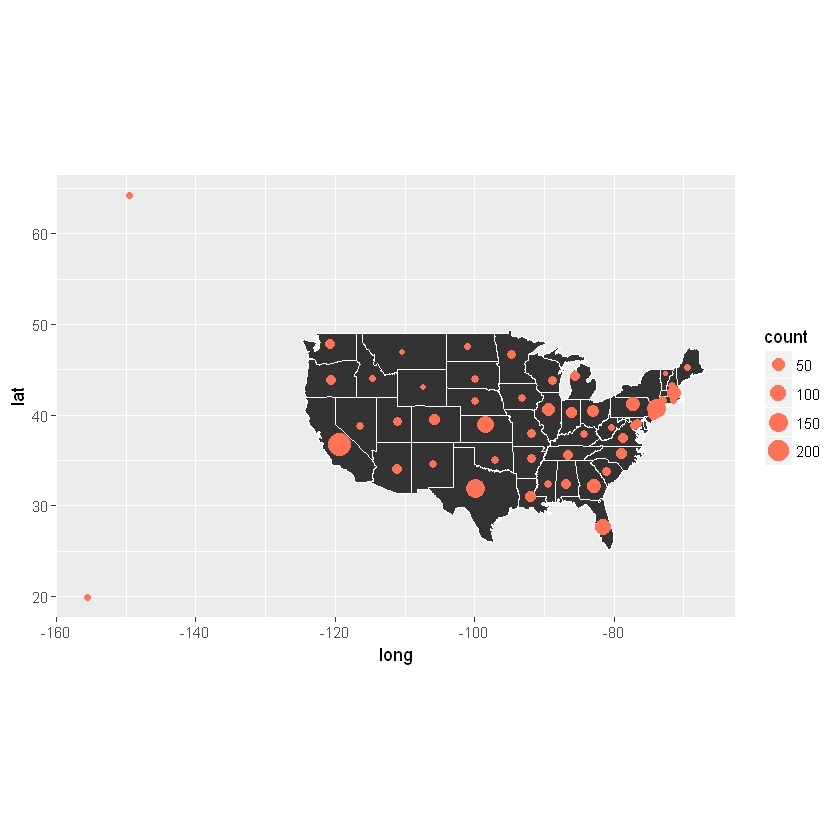

In [46]:
p <- ggplot()
p <- p + geom_polygon( data=us_state_map, aes(x=long, y=lat, group = group),colour="white" )
p <- p + geom_point( data=states_2, aes(x=lon, y=lat, size = count), color="coral1")+
coord_fixed(1.3)
p